In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from enum import Enum

class OCCLUSION(Enum):
    Low = 1
    Medium = 2
    High = 3

In [2]:
def get_test_log_df(model_type: str, model_id, test_id, occlusion):
    if isinstance(occlusion, OCCLUSION):
        occlusion = occlusion._value_
    base_path = '../../data/logs/test'
    log_path = f'{base_path}/{model_type}-{model_id}/{test_id}-{occlusion}.csv'
    df = pd.read_csv(log_path)
    return df

---
### Load Evaluation Logs

In [3]:
# Baseline
model_type = 'sac_v2'
model_id = '230704203226'
test_id = '230708214325'

baseline = {}
for occlusion in OCCLUSION:
    baseline[occlusion] = get_test_log_df(model_type, model_id, test_id, occlusion)

In [4]:
# Compare
model_type = 'sac_v2_lstm'
model_id = '230706072839'
test_id = '230708102319'

model = {}
for occlusion in OCCLUSION:
    model[occlusion] = get_test_log_df(model_type, model_id, test_id, occlusion)

---
Collision Success Rate

In [5]:
for df, key in ((baseline[key], key) for key in baseline):
    # Number of pedestrians crossed for each episode
    series = df.groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Baseline {key}: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Baseline OCCLUSION.Low: Max 36, Min 0, Average 7.46
Baseline OCCLUSION.Medium: Max 25, Min 0, Average 4.56
Baseline OCCLUSION.High: Max 21, Min 0, Average 3.92


In [52]:
for df, key in ((baseline[key], key) for key in baseline):
    # Number of pedestrians crossed for each episode
    series = df[df['pedestrian_crossed'] != 0].groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Model {key}: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Model OCCLUSION.Low: Max 36, Min 1, Average 10.36111111111111
Model OCCLUSION.Medium: Max 25, Min 1, Average 7.354838709677419
Model OCCLUSION.High: Max 21, Min 1, Average 7.2592592592592595


In [6]:
for df, key in ((baseline[key], key) for key in baseline):
    # Number of pedestrians crossed for each episode
    series = df.groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Baseline {key}:')
    print(series)

Baseline OCCLUSION.Low:
episode
0      0
1      0
2      0
3      0
4     29
5      0
6      0
7      0
8      2
9      6
10     2
11     6
12     0
13     0
14    26
15     3
16    20
17     5
18    17
19     5
20     0
21     2
22     3
23     0
24    30
25    11
26    24
27     7
28    12
29     6
30     6
31    15
32     0
33    11
34     1
35    16
36     2
37    36
38     9
39    24
40     5
41     1
42     3
43    13
44     0
45     2
46     4
47     7
48     0
49     2
Name: pedestrian_crossed, dtype: int64
Baseline OCCLUSION.Medium:
episode
0      0
1     10
2      2
3     17
4      0
5      7
6      6
7      1
8      3
9      0
10    15
11     0
12     3
13     2
14     4
15     0
16     7
17     0
18     0
19     0
20    25
21     1
22     0
23     5
24     0
25    12
26     7
27     0
28     2
29     1
30    11
31     0
32     2
33     0
34     8
35     7
36     0
37     0
38     0
39     8
40     0
41    15
42     4
43     1
44    12
45     0
46    21
47     0
48     2
49 

In [7]:
for df, key in ((model[key], key) for key in model):
    # Number of pedestrians crossed for each episode
    series = df.groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Model {key}: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Model OCCLUSION.Low: Max 40, Min 0, Average 24.54
Model OCCLUSION.Medium: Max 40, Min 0, Average 16.82
Model OCCLUSION.High: Max 40, Min 0, Average 13.38


In [51]:
for df, key in ((model[key], key) for key in model):
    # Number of pedestrians crossed for each episode
    series = df[df['pedestrian_crossed'] != 0].groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Model {key}: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Model OCCLUSION.Low: Max 40, Min 2, Average 35.05714285714286
Model OCCLUSION.Medium: Max 40, Min 1, Average 29.0
Model OCCLUSION.High: Max 40, Min 1, Average 24.77777777777778


In [8]:
for df, key in ((model[key], key) for key in model):
    # Number of pedestrians crossed for each episode
    series = df.groupby(['episode'])['pedestrian_crossed'].max()
    print(f'Model {key}:')
    print(series)

Model OCCLUSION.Low:
episode
0     35
1     34
2      0
3     39
4     37
5     37
6     34
7      0
8      0
9     36
10    34
11     0
12     0
13    39
14    38
15     0
16    25
17    36
18    35
19     0
20    37
21     2
22    35
23    29
24    38
25     0
26    37
27    36
28    39
29    35
30    35
31     0
32    38
33     0
34    36
35     0
36     0
37    36
38    33
39    38
40    33
41    38
42     0
43     0
44    38
45     0
46    38
47    37
48    40
49    40
Name: pedestrian_crossed, dtype: int64
Model OCCLUSION.Medium:
episode
0      0
1     35
2     37
3      6
4     10
5      0
6      0
7     40
8     38
9     33
10    36
11    31
12     1
13     0
14    38
15    10
16    36
17     0
18    36
19    36
20    31
21    22
22     7
23    37
24     0
25    40
26     0
27    19
28     0
29     0
30     0
31     0
32    37
33     0
34     0
35    37
36     0
37    37
38    37
39     4
40    32
41     0
42     0
43     0
44     0
45     0
46    39
47     0
48     0
49    39


---
Average Reward Value

In [9]:
for df, key in ((baseline[key], key) for key in baseline):
    series = df.groupby(['episode'])['reward']
    # Across all episodes
    print(f'Baseline {key} all episodes: Max {series.max().max()}, Min {series.min().min()}, Average {series.mean().mean()}')

Baseline OCCLUSION.Low all episodes: Max 0.9436071831014524, Min -1.0, Average 0.6245777105642611
Baseline OCCLUSION.Medium all episodes: Max 0.9464316579366672, Min -1.0, Average 0.6500125441969316
Baseline OCCLUSION.High all episodes: Max 0.9435148901450132, Min -1.0, Average 0.6644585565167318


In [10]:
for df, key in ((model[key], key) for key in model):
    series = df.groupby(['episode'])['reward']
    # Across all episodes
    print(f'Model {key} all episodes: Max {series.max().max()}, Min {series.min().min()}, Average {series.mean().mean()}')

Model OCCLUSION.Low all episodes: Max 0.9361854604125666, Min -1.0, Average 0.6795652901697161
Model OCCLUSION.Medium all episodes: Max 0.9342547678116684, Min -1.0, Average 0.7034069820459803
Model OCCLUSION.High all episodes: Max 0.9397995054270344, Min -1.0, Average 0.7206723070672707


In [11]:
for df, key in ((baseline[key], key) for key in baseline):
    series = df.groupby(['episode'])['reward']
    print(f'Baseline {key}')
    print(series.mean()) # Average of each episode

Baseline OCCLUSION.Low
episode
0     0.625134
1     0.545249
2     0.649076
3     0.696324
4     0.612887
5     0.615837
6     0.672110
7     0.589523
8     0.695648
9     0.608755
10    0.653874
11    0.536655
12    0.653552
13    0.477834
14    0.625297
15    0.614626
16    0.626304
17    0.632152
18    0.624029
19    0.624349
20    0.632735
21    0.669109
22    0.577052
23    0.650271
24    0.616863
25    0.627599
26    0.637364
27    0.621517
28    0.596858
29    0.630007
30    0.635245
31    0.607687
32    0.621855
33    0.632800
34    0.574259
35    0.632705
36    0.591135
37    0.649878
38    0.660320
39    0.639257
40    0.662421
41    0.646194
42    0.612731
43    0.650279
44    0.634133
45    0.626191
46    0.629858
47    0.616225
48    0.601909
49    0.665216
Name: reward, dtype: float64
Baseline OCCLUSION.Medium
episode
0     0.663702
1     0.661171
2     0.664255
3     0.646242
4     0.612036
5     0.637771
6     0.614756
7     0.632457
8     0.699607
9     0.647932
10    

In [12]:
for df, key in ((model[key], key) for key in model):
    series = df.groupby(['episode'])['reward']
    print(f'Model {key}')
    print(series.mean()) # Average of each episode

Model OCCLUSION.Low
episode
0     0.662009
1     0.667329
2     0.704787
3     0.656101
4     0.670718
5     0.631295
6     0.665461
7     0.725729
8     0.709983
9     0.657788
10    0.667140
11    0.685929
12    0.728468
13    0.648536
14    0.675057
15    0.743920
16    0.622799
17    0.666177
18    0.672865
19    0.733566
20    0.667788
21    0.721402
22    0.645488
23    0.663454
24    0.661443
25    0.682666
26    0.660296
27    0.675979
28    0.668318
29    0.662772
30    0.664269
31    0.741390
32    0.634922
33    0.702651
34    0.676686
35    0.747726
36    0.751230
37    0.680382
38    0.658814
39    0.662171
40    0.650916
41    0.661549
42    0.739705
43    0.682928
44    0.659788
45    0.694644
46    0.659478
47    0.670475
48    0.664451
49    0.668828
Name: reward, dtype: float64
Model OCCLUSION.Medium
episode
0     0.723128
1     0.682034
2     0.679555
3     0.684100
4     0.713699
5     0.742663
6     0.725412
7     0.690680
8     0.676501
9     0.687122
10    0.6907

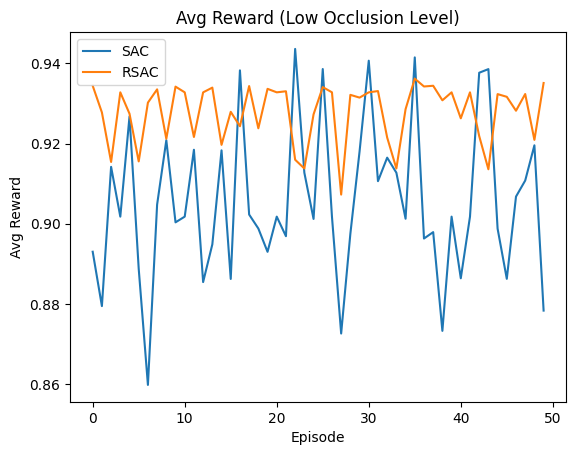

In [49]:
baseline[OCCLUSION.Low].groupby(['episode'])['reward'].max().plot(label='SAC')
model[OCCLUSION.Low].groupby(['episode'])['reward'].max().plot(label='RSAC')
plt.title('Avg Reward (Low Occlusion Level)')
plt.xlabel('Episode')
plt.ylabel('Avg Reward')
plt.legend()

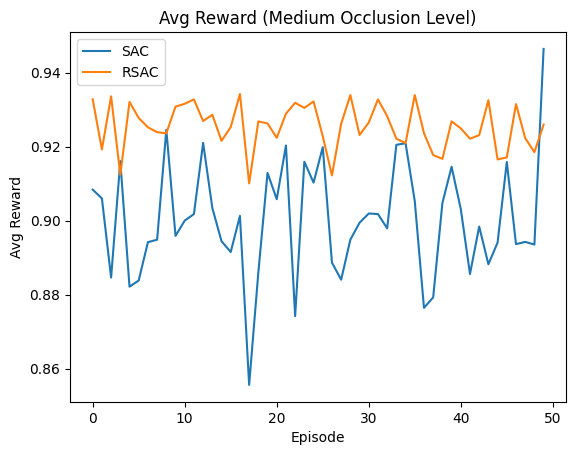

In [48]:
baseline[OCCLUSION.Medium].groupby(['episode'])['reward'].max().plot(label='SAC')
model[OCCLUSION.Medium].groupby(['episode'])['reward'].max().plot(label='RSAC')
plt.title('Avg Reward (Medium Occlusion Level)')
plt.xlabel('Episode')
plt.ylabel('Avg Reward')
plt.legend()

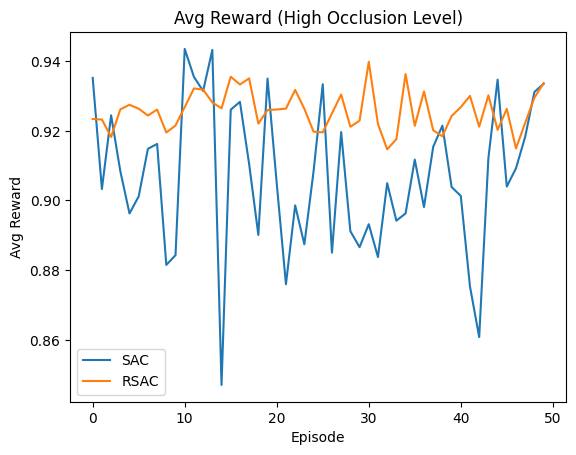

In [50]:
baseline[OCCLUSION.High].groupby(['episode'])['reward'].max().plot(label='SAC')
model[OCCLUSION.High].groupby(['episode'])['reward'].max().plot(label='RSAC')
plt.title('Avg Reward (High Occlusion Level)')
plt.xlabel('Episode')
plt.ylabel('Avg Reward')
plt.legend()

---
Episode Length

In [56]:
for df, key in ((baseline[key], key) for key in baseline):
    series = df.groupby(['episode'])['step'].max()
    # Across all episodes
    print(f'Baseline {key} all episodes: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Baseline OCCLUSION.Low all episodes: Max 222, Min 11, Average 68.78
Baseline OCCLUSION.Medium all episodes: Max 204, Min 10, Average 52.1
Baseline OCCLUSION.High all episodes: Max 167, Min 14, Average 50.94


In [57]:
for df, key in ((model[key], key) for key in model):
    series = df.groupby(['episode'])['step'].max()
    # Across all episodes
    print(f'Model {key} all episodes: Max {series.max()}, Min {series.min()}, Average {series.mean()}')

Model OCCLUSION.Low all episodes: Max 183, Min 14, Average 124.12
Model OCCLUSION.Medium all episodes: Max 194, Min 13, Average 96.84
Model OCCLUSION.High all episodes: Max 204, Min 15, Average 85.88


In [71]:
for df, key in ((baseline[key], key) for key in baseline):
    df_temp = df[df['completed'] == True]['step']
    print(f'Baseline Completion Step: Max {df_temp.max()}, Min {df_temp.min()}, Avg {df_temp.mean()}')

    df_temp = df[df['collided'] == True]['step']
    print(f'Baseline Collision Step: Max {df_temp.max()}, Min {df_temp.min()}, Avg {df_temp.mean()}')
    print()

Baseline Completion Step: Max 222, Min 222, Avg 222.0
Baseline Collision Step: Max 192, Min 11, Avg 63.31707317073171

Baseline Completion Step: Max nan, Min nan, Avg nan
Baseline Collision Step: Max 135, Min 10, Avg 48.9375

Baseline Completion Step: Max nan, Min nan, Avg nan
Baseline Collision Step: Max 167, Min 14, Avg 51.5



In [72]:
for df, key in ((model[key], key) for key in model):
    df_temp = df[df['completed'] == True]['step']
    print(f'Model Completion Step: Max {df_temp.max()}, Min {df_temp.min()}, Avg {df_temp.mean()}')

    df_temp = df[df['collided'] == True]['step']
    print(f'Model Collision Step: Max {df_temp.max()}, Min {df_temp.min()}, Avg {df_temp.mean()}')
    print()

Model Completion Step: Max 183, Min 157, Avg 174.59375
Model Collision Step: Max 152, Min 14, Avg 34.388888888888886

Model Completion Step: Max 194, Min 173, Avg 185.10526315789474
Model Collision Step: Max 187, Min 13, Avg 46.9375

Model Completion Step: Max 204, Min 187, Avg 196.72727272727272
Model Collision Step: Max 191, Min 15, Avg 54.61538461538461



In [34]:
# Completion
for df, key in ((baseline[key], key) for key in baseline):
    series = df[df['completed'] == True][['episode','step']]
    print(f'Baseline {key} Count: {series.count()}')
    print(series)

Baseline OCCLUSION.Low Count: episode    1
step       1
dtype: int64
      episode  step
2665       37   222
Baseline OCCLUSION.Medium Count: episode    0
step       0
dtype: int64
Empty DataFrame
Columns: [episode, step]
Index: []
Baseline OCCLUSION.High Count: episode    0
step       0
dtype: int64
Empty DataFrame
Columns: [episode, step]
Index: []


In [35]:
for df, key in ((model[key], key) for key in model):
    series = df[df['completed'] == True][['episode','step']]
    print(f'Baseline {key} Count: {series.count()}')
    print(series)

Baseline OCCLUSION.Low Count: episode    32
step       32
dtype: int64
      episode  step
173         0   173
348         1   174
540         3   173
718         4   177
882         5   163
1064        6   181
1271        9   168
1442       10   170
1658       13   171
1841       14   182
2158       17   181
2339       18   180
2536       20   177
2763       22   171
3092       24   175
3290       26   175
3473       27   182
3649       28   175
3826       29   176
4002       30   175
4177       32   157
4379       34   183
4614       37   183
4792       38   177
4976       39   183
5140       40   163
5314       41   173
5531       44   176
5731       46   172
5910       47   178
6084       48   173
6255       49   170
Baseline OCCLUSION.Medium Count: episode    19
step       19
dtype: int64
      episode  step
199         1   180
385         2   185
780         7   188
960         8   179
1150        9   189
1338       10   187
1718       14   189
1995       16   191
2211       18  